In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import seaborn as sns

In [3]:
ambiente = pd.read_csv("../../data/ambiente_001_2021-07-02_2021-07-05.csv",index_col=0,parse_dates=True)
# caja800ppm = pd.read_csv("../../data/cajahermetica800ppm.csv",index_col=0,parse_dates=True)

sensores = list(ambiente.columns)
ref = "fluke"
sensores.remove(ref)
datos = pd.concat([ambiente],axis=0)


In [4]:
diferencia = pd.concat([datos[sensor]-datos[ref] for sensor in sensores],axis=1)
diferencia.columns = sensores


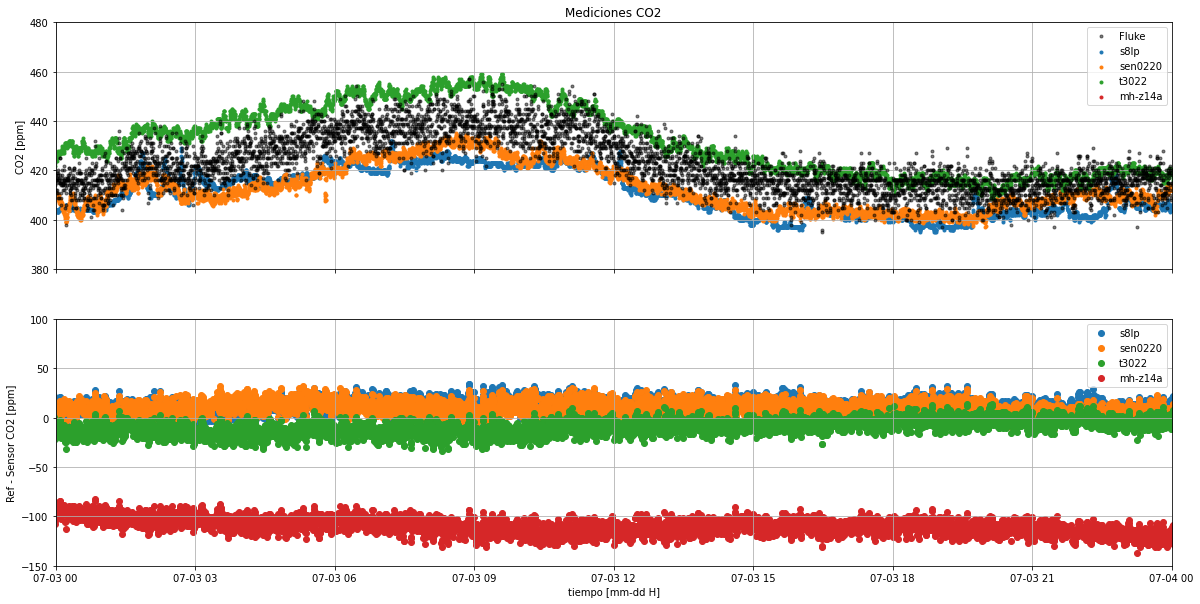

In [20]:
fig, ax = plt.subplots(2,figsize=(20,10),sharex=True)


fecha1 = parse("2021-07-03") 
fecha2 = fecha1 + pd.Timedelta("1D")
ax[0].set_xlim(fecha1,fecha2)


ax[0].set_ylim(380,480)
ax[0].set_ylabel("CO2 [ppm]")
ax[0].set_title("Mediciones CO2")


ax[1].set_ylim(-150,100)
ax[1].set_ylabel("Ref - Sensor CO2 [ppm]")
ax[1].set_xlabel("tiempo [mm-dd H]")


ax[0].plot(datos.fluke,"k.",label="Fluke",alpha=0.5)
for sensor in sensores:
    ax[0].scatter(datos[sensor].index,datos[sensor],label=sensor,marker=".")


for sensor in sensores:
    ax[1].scatter(datos.index,datos[ref]-datos[sensor],label=sensor)


ax[1].legend()
ax[1].grid()
ax[0].legend()
ax[0].grid()




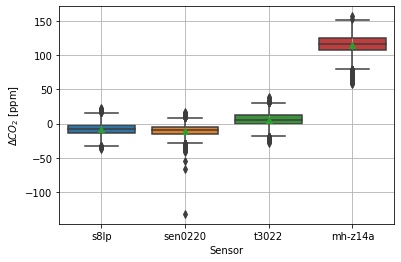

In [6]:
plt.ylabel("$\Delta CO_2$ [ppm]")
plt.xlabel("Sensor")
sns.boxplot(data=diferencia,showmeans=True)

plt.grid() 

In [7]:
for sensor in sensores:
    print(sensor,round(diferencia[sensor].mean(),0),round(diferencia[sensor].std(),0))

s8lp -8.0 8.0
sen0220 -10.0 7.0
t3022 6.0 9.0
mh-z14a 115.0 15.0
